<a href="https://colab.research.google.com/github/UritiSrikanth/Blood-Cells-Cancer-detection-using-CNN/blob/main/EDA_of_the_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [6]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import local_binary_pattern
from PIL import Image

**Display samples from the dataset**

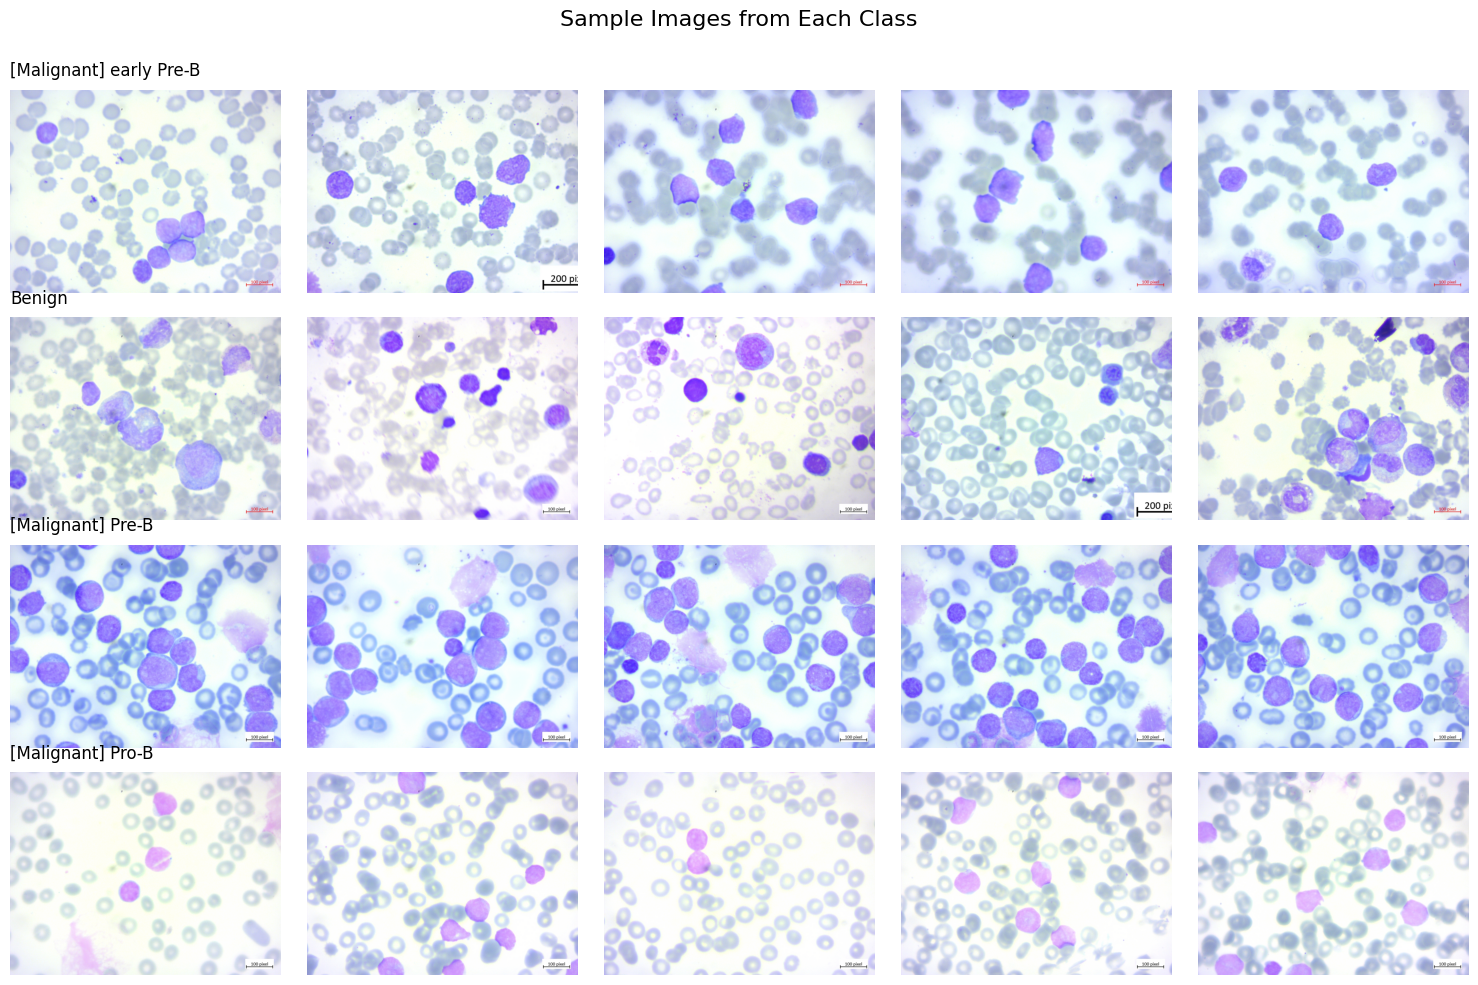

In [7]:
# Dataset folder path
dataset_path = "/content/drive/MyDrive/Blood cell Cancer [ALL]"

# Number of samples to display per class
samples_per_class = 5

# Create a figure for displaying the images
plt.figure(figsize=(15, 10))

# Loop through each class and display sample images
class_names = os.listdir(dataset_path)
for i, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        # Get a list of images in the class folder
        image_files = os.listdir(class_folder)

        # Randomly select a subset of images from the class
        sample_images = random.sample(image_files, min(samples_per_class, len(image_files)))

        # Loop through each selected image and display it
        for j, image_name in enumerate(sample_images):
            image_path = os.path.join(class_folder, image_name)
            try:
                # Open and display the image
                img = Image.open(image_path)
                ax = plt.subplot(len(class_names), samples_per_class, i * samples_per_class + j + 1)
                plt.imshow(img)
                plt.axis('off')

                # Add title for each class at the top of the first image in each row
                if j == 0:
                    ax.set_title(class_name, loc='left', fontsize=12, pad=10)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**Class Distribution**

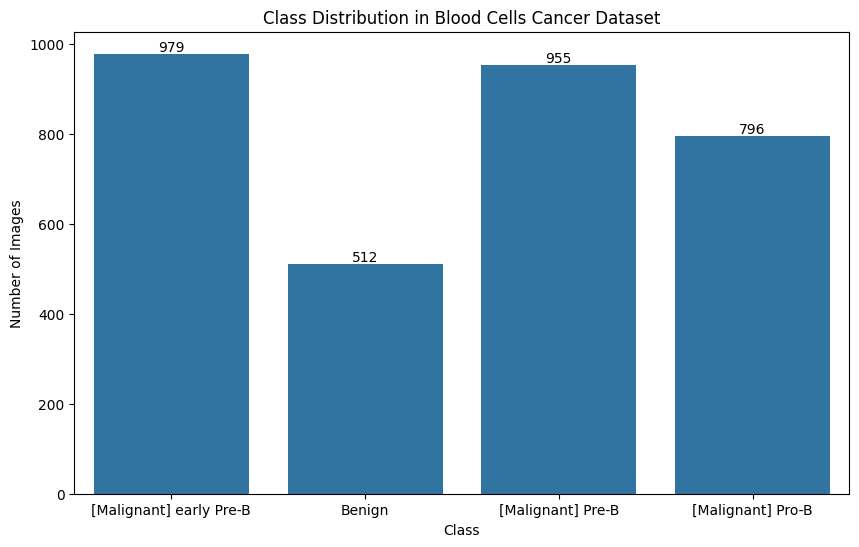

In [8]:
# Get class names and count the number of images in each class folder
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        class_counts[class_name] = len(os.listdir(class_folder))

# Convert the counts to a DataFrame for easy plotting
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

# Plotting the class distribution using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Class', y='Image Count', data=df_class_counts)
plt.title("Class Distribution in Blood Cells Cancer Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")

# Annotate each bar with the image count
for index, row in df_class_counts.iterrows():
    ax.text(index, row['Image Count'] + 5, row['Image Count'], color='black', ha="center")

plt.show()


**Checking for image properties: Height and Width for the images in each class**

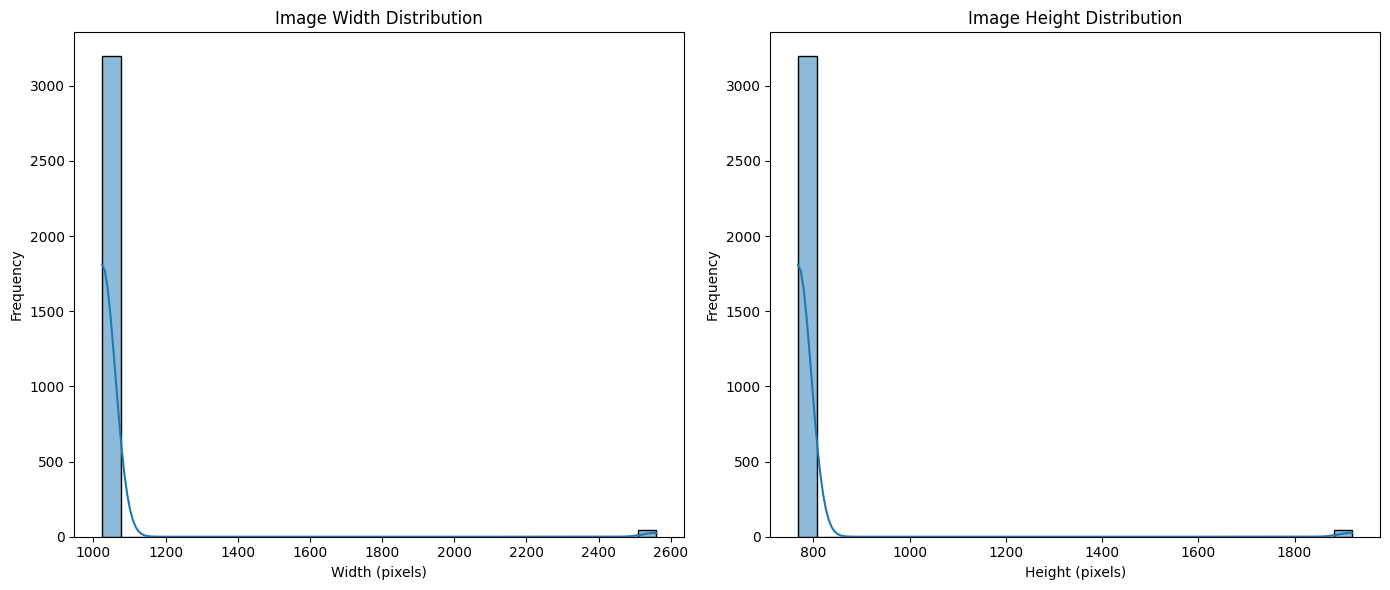

In [9]:
# List to store image properties
image_properties = []

# Iterate over each class folder
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        # Iterate over each image in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                # Open image and get its size
                with Image.open(image_path) as img:
                    width, height = img.size
                    # Ignore images with 2600 x 2600 dimensions
                    if width == 2600 and height == 2600:
                        continue
                    image_properties.append({
                        'Class': class_name,
                        'Width': width,
                        'Height': height
                    })
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert to DataFrame for easy analysis
df_image_properties = pd.DataFrame(image_properties)

# Plotting image width and height histograms
plt.figure(figsize=(14, 6))

# Plot width histogram
plt.subplot(1, 2, 1)
sns.histplot(df_image_properties['Width'], bins=30, kde=True)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

# Plot height histogram
plt.subplot(1, 2, 2)
sns.histplot(df_image_properties['Height'], bins=30, kde=True)
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
